In [13]:
import sys
sys.path.insert(0, "/home/ubuntu/aiclass/1731036011_euihyeoklee")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
%matplotlib inline
# pip install pygraphviz

In [14]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01
)

In [15]:
# n.draw_and_show(figsize=(20, 10))

In [29]:
# data = mnist.MNIST_Data()
data = mnist.Fashion_MNIST_Data()

In [30]:
forward_final_output = n.feed_forward(input_data=data.test_input)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
n.learning(max_epoch=100, data=data, batch_size=batch_size, print_period=1, verbose=False)

forward_final_output = n.feed_forward(input_data=data.test_input)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.1602


ValueError: operands could not be broadcast together with shapes (1000,) (1000,10) 

ValueError: x and y must have same first dimension, but have shapes (101,) and (0,)

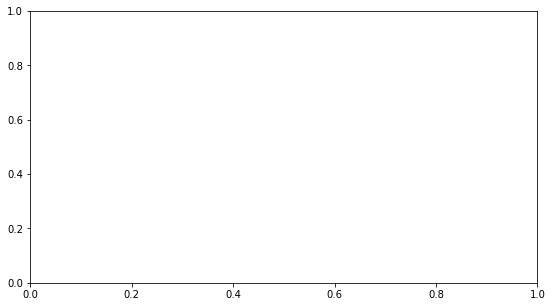

In [31]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

In [21]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

NameError: name 'data' is not defined

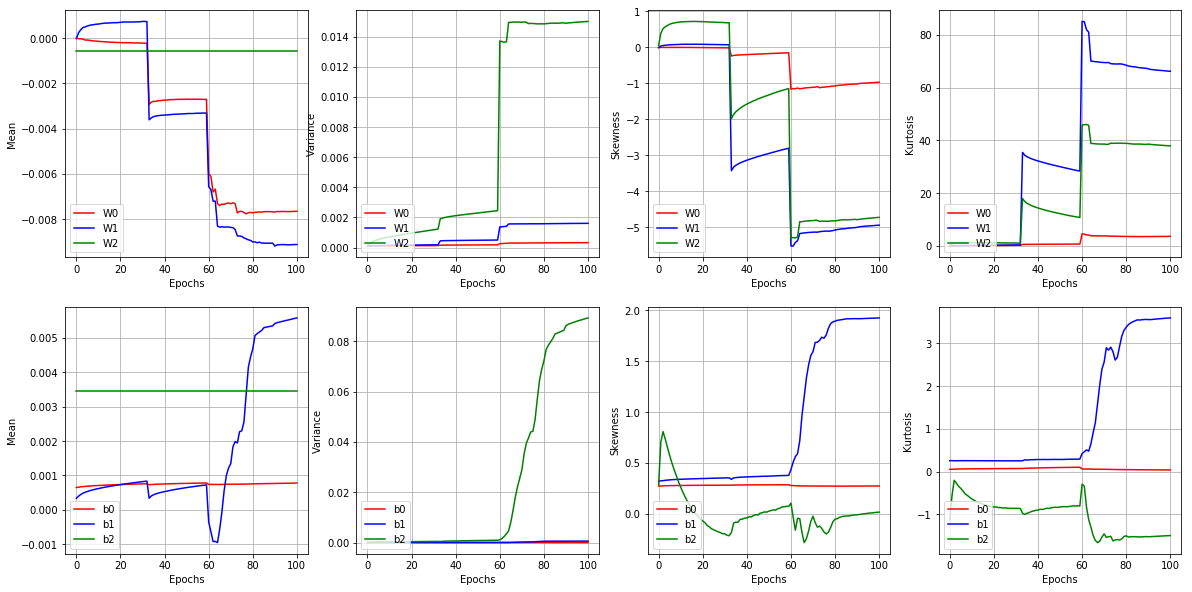

In [24]:
n.draw_param_description(figsize=(20, 10))